In [21]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import scipy.optimize as opt
%matplotlib inline

In [13]:
X = np.random.randint(0,100000, size = 500)

In [14]:
eps = sts.norm.rvs(loc = 0, scale = 0.2,size = 500 )

In [15]:
Y = 0.5*X+1+eps

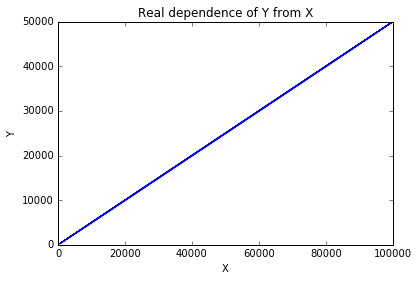

In [131]:
plt.plot(X,Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Real dependence of Y from X')

In [103]:
def fun(args):
    error = ((args[0]*X + args[1] - Y).reshape(1,500)).dot((args[0]*X + args[1] - Y).reshape(500,1))
    return error[0][0]

In [60]:
res = opt.minimize(fun, x0 = [0,0])

In [129]:
res

      fun: 21.109297631512398
 hess_inv: array([[  1.16244533e-12,  -5.81074553e-08],
       [ -5.81074553e-08,   3.90463237e-03]])
      jac: array([  2.41458479e+04,   3.52128506e-01])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 388
      nit: 2
     njev: 94
   status: 2
  success: False
        x: array([ 0.49999958,  1.02034304])

In [76]:
x = np.array(range(0,100000,10))

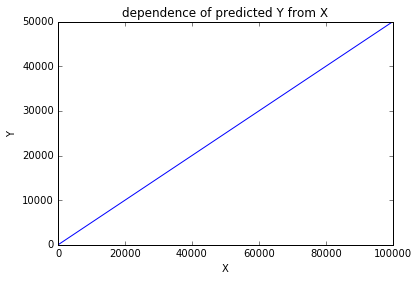

In [133]:
plt.plot(x, res.x[0]*x+res.x[1])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('dependence of predicted Y from X')

In [79]:
eps_add = sts.norm.rvs(loc = 0, scale = 0.2,size = 75 )

In [80]:
Y_add = -1 + eps_add

In [81]:
X_add = np.random.randint(0,100000, size = 75)

In [99]:
X_new = np.append(X, X_add)

In [100]:
Y_new = np.append(Y, Y_add)

In [122]:
def fun_MSE(args):
    error = ((args[0]*X_new + args[1] - Y_new).reshape(1,575)).dot((args[0]*X_new + args[1] - Y_new).reshape(575,1))
    return error[0][0]

In [123]:
def fun_MAE(args):
    error = sum(abs(args[0]*X_new + args[1] - Y_new))
    return error

In [124]:
res_MAE = opt.minimize(fun_MAE, x0 = [0,0])

In [126]:
res_MSE = opt.minimize(fun_MSE, x0 = [0,0])

In [116]:
res_MAE

      fun: 1981385.9098813767
 hess_inv: array([[  1.82056506e-14,  -9.96080933e-14],
       [ -9.96080933e-14,   1.36439482e-08]])
      jac: array([  1.72349156e+05,   1.00000000e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 185
      nit: 8
     njev: 46
   status: 2
  success: False
        x: array([ 0.49999947,  0.99634309])

In [127]:
res_MSE

      fun: 57214349080.24032
 hess_inv: array([[  1.02843182e-12,  -5.17925800e-08],
       [ -5.17925800e-08,   3.47792196e-03]])
      jac: array([-47616.,      0.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 252
      nit: 2
     njev: 60
   status: 2
  success: False
        x: array([  0.43276028, -58.75872016])

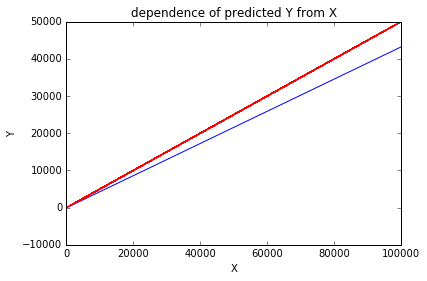

In [134]:
plt.plot(x, res_MSE.x[0]*x+res_MSE.x[1])
plt.plot(x, res_MAE.x[0]*x+res_MAE.x[1])
plt.plot(X,Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('dependence of predicted Y from X')

MAE более устойчива к выбросам, так как абсолютное отклонение вносит меньший вклад в ошибку, в сравнении с квадратом отклонения, поэтому модель в случае MSE переобучается под выбросы